In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:
with open("../../data/lung/geno.txt") as g, open("../../data/lung/filtered_dosage.txt", "w") as f:
    for line in tqdm(g):
        dosage = line.split()
        filtered_dosage = ["0" if int(e.strip()) < 0 else e.strip() for e in dosage]

        f.write(f'{" ".join(filtered_dosage)}\n')

In [ ]:
# Generate data
data = np.random.rand(1 << 13, 4) * 2
# Scale down some dimensions
data[:, 1] /= 2
data[:, 3] /= 2
np.savetxt("../../data/pca/sample.txt", data, fmt='%10.2f')

In [79]:
# Load data
data = np.loadtxt("../../data/lung/filtered_dosage.txt", dtype=float, max_rows=256)[:, :1<<17]
data -= data.mean(axis=0)


In [84]:
# Sklearn PCA
from sklearn.decomposition import PCA

sklearn_components = PCA(n_components=2).fit_transform(data)

In [77]:
# Load 
codon_components = np.loadtxt("../../results/pca_results_CP1_local_on_field_codon.txt")
codon_components[:, 1] *= -1

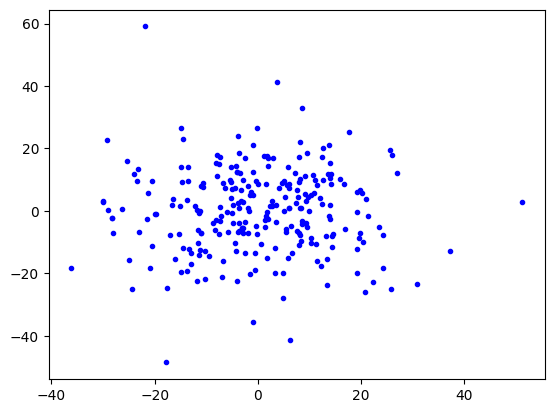

In [85]:
from matplotlib.pyplot import plot

plot(*sklearn_components.T, 'b.')
# plot(*codon_components.T, 'r.')


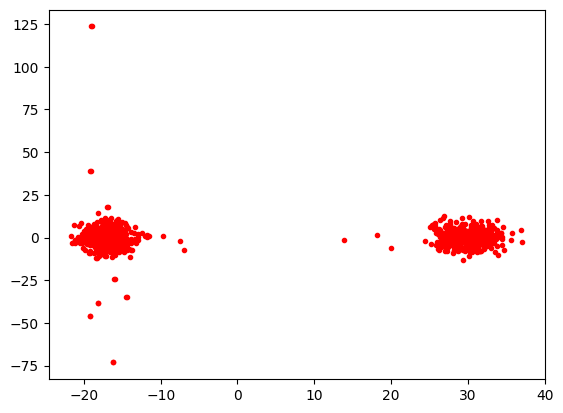